In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gravhydro as gh

In [2]:
# dr = 1.0
# lim = 2.0
# lim0 = 2.0
# r = np.array([])
# base_n_pt = 100
# total_N = 0
# for i in range(3):
#     n_pts = int(base_n_pt * 2 * np.pi* lim)
#     total_N += n_pts
#     new_r = np.random.normal(lim + dr/2, dr/4, n_pts)# np.random.uniform(lim, lim + dr, 200)
#     # plt.hist(new_r, bins=50)
#     lim += dr*2
#     r = np.append(r, new_r)

# theta = np.random.uniform(0, 2 * np.pi, total_N)
# x_ls = r * np.cos(theta)
# y_ls = r * np.sin(theta)
# pos = np.array([x_ls, y_ls]).T

In [3]:
dy = 1.0
lim = 1.0
lim0 = 1.0
y = np.array([])
npts = 400
nsteps = 3
total_N = npts * nsteps
for i in range(nsteps):
    new_y = np.random.normal(lim + dy/2, dy/3, npts)# np.random.uniform(lim, lim + dr, 200)
    lim += dy*2
    y = np.append(y, new_y)
x_ls = np.random.uniform(0, 10, total_N)
y_ls = y + np.cos(x_ls)
pos = np.array([x_ls, y_ls]).T

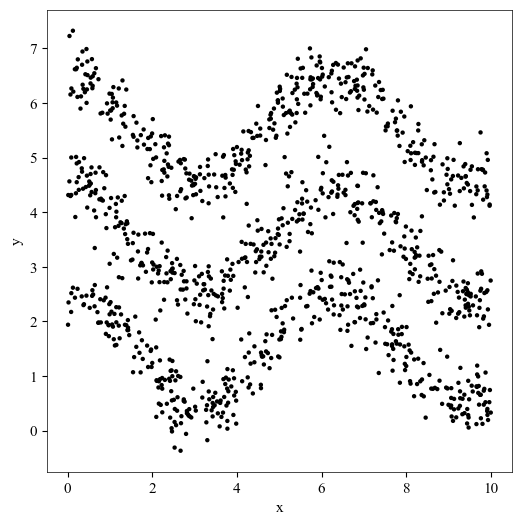

In [4]:
# # Let's say we have particles taken from several gaussian distributions
# pos = np.random.normal(0, 2, (600, 2))  # 500 particles in 2D
# pos = np.append(pos, np.random.normal(1, 0.25, (200, 2)), axis=0)  # 1000 particles in 3D
# pos = np.append(pos, np.random.normal(-1, 0.1, (100, 2)), axis=0)

# and let's say that they have randomized masses 
# (cooresponding to pt size in figure)

masses = np.ones(pos.shape[0])*10#np.random.normal(100, 20, (900)) / 10

plt.figure(figsize=(6, 6))
plt.scatter(pos[:, 0], pos[:, 1], s=masses)
plt.xlabel('x')
plt.ylabel('y')
# plt.xlim(-8,8)
# plt.ylim(-8,8)
plt.show()

# Kernel Function

In [5]:
# def W(r, h):
#     q = r / (2 * h)
#     first_mask = (q >= 0) & (q <= 1/2)
#     second_mask = (q > 1/2) & (q <= 1)
#     third_mask = ~(first_mask | second_mask)
#     Ws = np.zeros_like(r)
#     Ws[first_mask] = 8 * (1 - 6 * q[first_mask]**2 + 6 * q[first_mask]**3) / np.pi
#     Ws[second_mask] = 8 * (2 * (1 - q[second_mask])**3) / np.pi
#     Ws[third_mask] = 0
#     return Ws

    
    #     return 8 * (1 - 6 * q**2 + 6 * q**3) / np.pi
    # elif (q > 1/2) and (q <= 1):
    #     return 8 * (2 * (1 - q)**3) / np.pi
    # else:
    #     return 0

In [6]:
from gravhydro import W

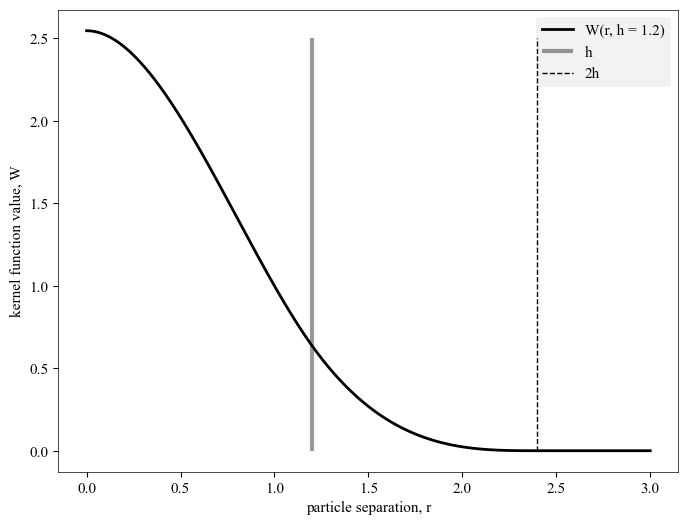

In [7]:
rlist = np.linspace(0, 3, 1000)
h = 1.2
plt.plot(rlist, W(rlist, h), label=f'W(r, h = {h})', color='k', lw=2, zorder=-1)
plt.vlines(h, 0, 2.5, color='k', lw=3, alpha=0.4, label='h')
plt.vlines(2 * h, 0, 2.5, color='k', linestyle='--', lw=1,alpha=1, label='2h')

plt.legend()
plt.xlabel('particle separation, r')
plt.ylabel('kernel function value, W')
plt.show()

**Figure interpretation**
(Note: opaque lines are the h values and thick lines are 2h values)

* When $r \leq h$ (left of the opaque line): 
  * $W = \frac{8}{\pi} \left (1 - 6 (\frac{r}{2h})^2 + 6 (\frac{r}{2h})^3 \right ) $
* When $ h < r \leq 2h$ (between opaque and dashed lines):
  *  $W = \frac{16}{\pi} \left (1 - (\frac{r}{2h})^3 \right ) $
* When $ r > 2h$ (right of dashed line):
  *  $W = 0 $

/Users/gabrielpfaffman/gravHydro/gravhydro/hydro/kernel.py:21: RuntimeWarning: divide by zero encountered in divide
  q = r / (2 * h)
/Users/gabrielpfaffman/gravHydro/gravhydro/hydro/kernel.py:21: RuntimeWarning: invalid value encountered in divide
  q = r / (2 * h)


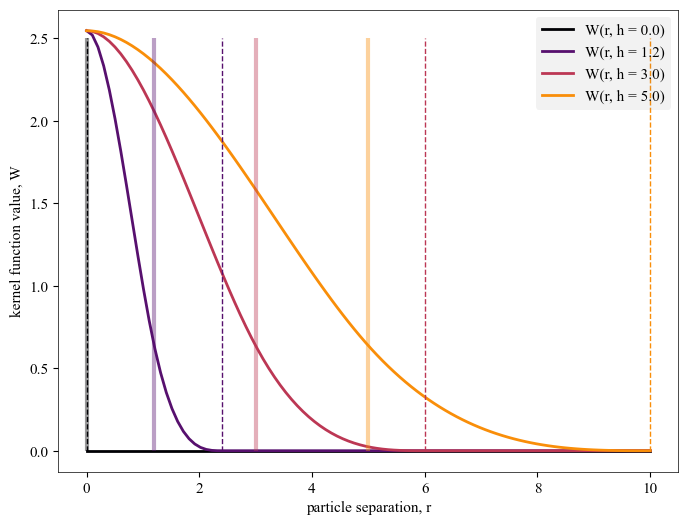

In [8]:
from matplotlib import cm

rlist = np.linspace(0, 10, 100)
hlist = np.array([0.0, 1.2, 3.0, 5.0])#np.linspace(0, 3, 4)
colors = cm.inferno(np.linspace(0, 1, len(hlist)+1))[:-1]

for h, color in zip(hlist, colors):
    plt.vlines(h, 0, 2.5, color=color, lw=3, alpha=0.4)
    plt.vlines(2 * h, 0, 2.5, color=color, linestyle='--', lw=1,alpha=1)
    plt.plot(rlist, W(rlist, h), label=f'W(r, h = {h})', color=color, lw=2, zorder=-1)

plt.legend()
plt.xlabel('particle separation, r')
plt.ylabel('kernel function value, W')
plt.show()

**Figure interpretation**

Same as the last figure, but for multiple h values.

As you can see in the figure, larger $h$ values make $W $ extend to larger $r$. In practice, this means that larger $h$ values translates to  the influence of more distant particles.



# Density
$\left \langle  \rho \right \rangle_i = \sum_j m_j W(r_i - r_j, h_i)$

Essentially, we can estimate the density at a particle's location by taking a weighted sum of the rest of the mass. The sum is weighed by the kernel function, $W$.

In [9]:
# def density_i(r, rs, masses, h):
#     return np.sum(masses * W(np.linalg.norm(r - rs, axis=1), h))

# # TO FIX: vectorize this function and remove self-summing
# def densities(positions, masses, h):
#     dens = np.zeros(positions.shape[0])
#     for i, pos in enumerate(positions):
#         dens[i] = density_i(positions[i], positions, masses, h)
#     return dens

In [10]:
from gravhydro import densities, density_i

In [13]:
rhos = densities(pos, masses, h=0.5) #pdf(pos.T)

(array([ 17.,  35.,  88., 121., 243., 276., 210., 137.,  56.,  17.]),
 array([ 60.21039217, 124.84792234, 189.4854525 , 254.12298267,
        318.76051284, 383.39804301, 448.03557318, 512.67310335,
        577.31063352, 641.94816369, 706.58569385]),
 <BarContainer object of 10 artists>)

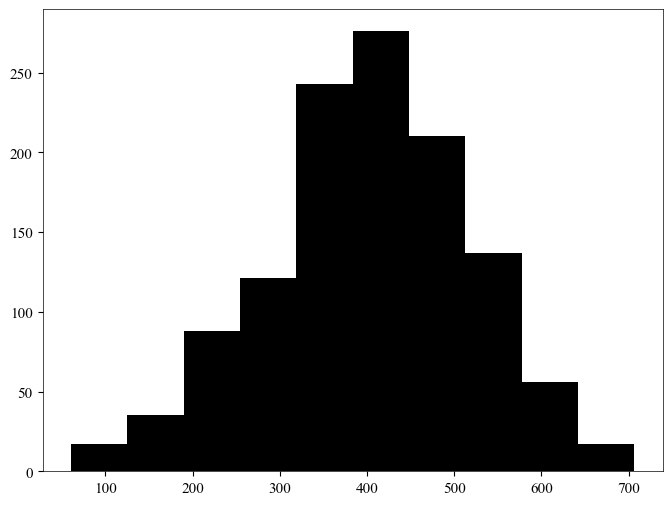

In [14]:
plt.hist(rhos)

In [15]:
# plt.scatter(np.linalg.norm(pos, axis=1), rhos, s=1)
# plt.xlabel('r')
# plt.ylabel('density')

In [16]:
# # the same plot as before, but now the points a scaled by their density
# plt.figure(figsize=(6, 6))
# mean_rho = np.mean(rhos)
# minmax = max([np.abs(mean_rho - np.min(rhos)), np.abs(mean_rho - np.max(rhos))])

# plt.scatter(pos[:, 0], pos[:, 1], c=rhos, cmap='RdBu', s=5, vmin=mean_rho-minmax, vmax=mean_rho + minmax)
# plt.xlabel('x')
# plt.ylabel('y')
# # plt.xlim(-8,8)
# # plt.ylim(-8,8)
# plt.show()

In [17]:
# plt.imshow(density_grid.T, origin='lower')

In [18]:
import numpy as np

import plotly.graph_objects as go
grid_sz = 40
density_grid = np.zeros((grid_sz, grid_sz))
xgrid = np.linspace(0, 10, grid_sz)
ygrid = np.linspace(0, 7, grid_sz)
for i, x in enumerate(xgrid):
    for j, y in enumerate(ygrid):
        density_grid[i, j] = density_i(np.array([x, y]), pos, masses, h=0.5)
# Define a range of h values
h_values = np.linspace(0.1, 2.0, 20)

# Create frames for the animation
frames = []
for h in h_values:
    density_grid = np.zeros((len(xgrid), len(ygrid)))
    for i, x in enumerate(xgrid):
        for j, y in enumerate(ygrid):
            density_grid[i, j] = density_i(np.array([x, y]), pos, masses, h=h)
    frame = go.Frame(
        data=[
            go.Heatmap(
                z=density_grid.T,
                x=xgrid,
                y=ygrid,
                colorscale="Viridis",
                colorbar=dict(title="Density"),
            )
        ],
        name=f"h={h:.2f}",
    )
    frames.append(frame)

# Create the initial plot
initial_h = h_values[0]
initial_density_grid = np.zeros((len(xgrid), len(ygrid)))
for i, x in enumerate(xgrid):
    for j, y in enumerate(ygrid):
        initial_density_grid[i, j] = density_i(np.array([x, y]), pos, masses, h=initial_h)

# Create the figure
fig = go.Figure(
    data=[
        go.Heatmap(
            z=initial_density_grid.T,
            x=xgrid,
            y=ygrid,
            colorscale="Viridis",
            colorbar=dict(title="Density"),
        )
    ],
    layout=go.Layout(
        title="Density Heatmap with Adjustable h",
        xaxis=dict(title="x"),
        yaxis=dict(title="y"),
        sliders=[
            dict(
                active=0,
                currentvalue={"prefix": "h: "},
                pad={"t": 50},
                steps=[
                    dict(
                        method="animate",
                        args=[
                            [f"h={h:.2f}"],
                            dict(frame=dict(duration=500, redraw=True), mode="immediate"),
                        ],
                        label=f"{h:.2f}",
                    )
                    for h in h_values
                ],
            )
        ],
        updatemenus=[
            dict(
                type="buttons",
                showactive=False,
                buttons=[
                    dict(
                        label="Play",
                        method="animate",
                        args=[None, dict(frame=dict(duration=500, redraw=True), fromcurrent=True)],
                    ),
                    dict(
                        label="Pause",
                        method="animate",
                        args=[[None], dict(frame=dict(duration=0, redraw=False, mode="immediate"))],
                    ),
                ],
            )
        ],
    ),
    frames=frames,
)

# Show the interactive plot
fig.show()

In [19]:
# # kernel = gaussian_kde(pos.T, weights=masses)
# # pdf = kernel.evaluate


# # the same plot as before, but now the points a scaled by their density
# plt.figure(figsize=(6, 6))
# plt.scatter(pos[:, 0], pos[:, 1], s=rhos/100)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.xlim(-6,6)
# plt.ylim(-6,6)
# plt.show()

In the above figure, the size of the particle is proportional to its density, approximated with the weighted sum. As expected, particles that are in denser regions are larger.

## Testing for convergence

the density should eventually level out for a large enough h value. At a large enough h value, all particle separations should be much less than $h$, and the densities of all particles should be roughly equal (total mass / number of particles)

In [20]:
# most distant particle separation:
max_sep = np.max(np.linalg.norm(pos[:, np.newaxis, :] - pos[np.newaxis, :, :], axis=2))
print("max particle separation:", max_sep)
theoretical_max_density = np.sum(masses * W(np.array([0.0]), h=1))
print("theoretical max density (h=1):", theoretical_max_density)

max particle separation: 12.141056675448835
theoretical max density (h=1): 30557.749073643907


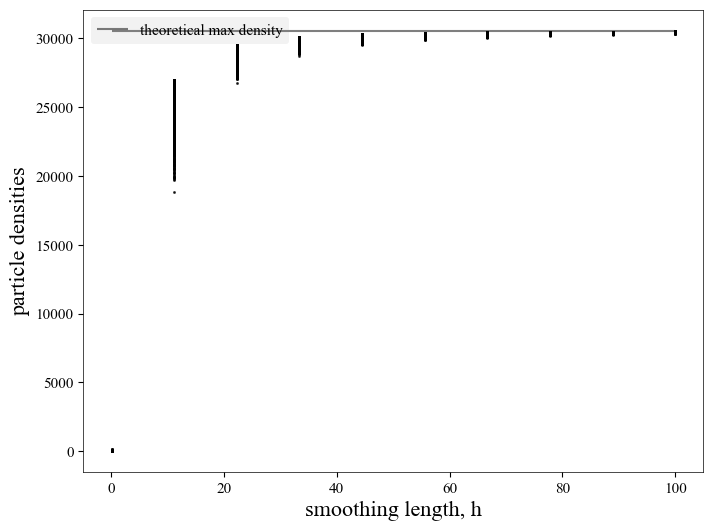

In [21]:
hlist = np.linspace(0.1, 100, 10)
for h in hlist:
    rhos_i = densities(pos, masses, h=h)
    plt.scatter([h]*len(rhos_i), rhos_i, color='k', s=1, alpha=0.5)
plt.xlabel('smoothing length, h', fontsize=16)
plt.ylabel('particle densities', fontsize=16)
plt.hlines(theoretical_max_density, xmin=hlist[0], xmax=hlist[-1], color='k', linestyle='-', label='theoretical max density', alpha=0.5, )
# plt.xscale('log')
# plt.yscale('log')
plt.legend()
plt.show()


In [22]:
# plt.figure(figsize=(6, 6))
# plt.scatter(pos[:, 0], pos[:, 1], s=rhos/100)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.xlim(-4,4)
# plt.ylim(-4,4)
# plt.show()

In [23]:
# import numpy as np

# import plotly.graph_objects as go

# # Define a range of h values
# h_values = np.linspace(0.1, 10.0, 20)

# # Create frames for the animation
# frames = []
# for h in h_values:
#     rhos = densities(pos, masses, h=h)
#     scatter = go.Scatter(
#         x=pos[:, 0],
#         y=pos[:, 1],
#         mode='markers',
#         marker=dict(size=rhos / 100, color=rhos, colorscale='Viridis', showscale=True),
#         name=f"h={h:.2f}",
#     )
#     frames.append(go.Frame(data=[scatter], name=f"h={h:.2f}"))

# # Create the initial plot
# initial_rhos = densities(pos, masses, h=h_values[0])
# initial_scatter = go.Scatter(
#     x=pos[:, 0],
#     y=pos[:, 1],
#     mode='markers',
#     marker=dict(size=initial_rhos / 100, color=initial_rhos, colorscale='Viridis', showscale=True),
#     name=f"h={h_values[0]:.2f}"
# )

# # Create the figure
# fig = go.Figure(
#     data=[initial_scatter],
#     layout=go.Layout(
#         title=f"Density Animation for Different h",
#         xaxis=dict(title="x", range=[-4, 4], scaleanchor="y", scaleratio=1),
#         yaxis=dict(title="y", range=[-4, 4]),
#         autosize=False,
#         width=600,
#         height=600,
#         updatemenus=[
#             dict(
#                 type="buttons",
#                 showactive=False,
#                 buttons=[
#                     dict(label="Play",
#                          method="animate",
#                          args=[None, dict(frame=dict(duration=500, redraw=True), fromcurrent=True)]),
#                     dict(label="Pause",
#                          method="animate",
#                          args=[[None], dict(frame=dict(duration=0, redraw=False), mode="immediate")])
#                 ]
#             )
#         ]
#     ),
#     frames=frames
# )

# # Show the animation
# fig.show()

In [24]:
# # Define a range of h values
# h_values = np.linspace(0.1, 1000.0, 20)

# # Create frames for the animation
# frames = []
# for h in h_values:
#     rhos = densities(pos, masses, h=h)
#     scatter = go.Scatter(
#         x=pos[:, 0],
#         y=pos[:, 1],
#         mode='markers',
#         marker=dict(size=rhos / 100, color=rhos, colorscale='Viridis', showscale=True),
#         name=f"h={h:.2f}",
#     )
#     frames.append(go.Frame(data=[scatter], name=f"h={h:.2f}"))

# # Create the initial plot
# initial_rhos = densities(pos, masses, h=h_values[0])
# initial_scatter = go.Scatter(
#     x=pos[:, 0],
#     y=pos[:, 1],
#     mode='markers',
#     marker=dict(size=initial_rhos / 100, color=initial_rhos, colorscale='Viridis', showscale=True),
#     name=f"h={h_values[0]:.2f}"
# )

# # Create the figure
# fig = go.Figure(
#     data=[initial_scatter],
#     layout=go.Layout(
#         title=f"Density Animation for Different h",
#         xaxis=dict(title="x", range=[-4, 4], scaleanchor="y", scaleratio=1),
#         yaxis=dict(title="y", range=[-4, 4]),
#         autosize=False,
#         width=600,
#         height=600,
#         updatemenus=[
#             dict(
#                 type="buttons",
#                 showactive=False,
#                 buttons=[
#                     dict(label="Play",
#                          method="animate",
#                          args=[None, dict(frame=dict(duration=500, redraw=True), fromcurrent=True)]),
#                     dict(label="Pause",
#                          method="animate",
#                          args=[[None], dict(frame=dict(duration=0, redraw=False), mode="immediate")])
#                 ]
#             )
#         ]
#     ),
#     frames=frames
# )

# # Show the animation
# fig.show()

In [25]:
# # We can also plot the PDF on a continuous colormap
# x = np.linspace(-4, 4, 100)
# y = np.linspace(-4, 4, 100)
# X, Y = np.meshgrid(x, y)
# positions = np.vstack([X.ravel(), Y.ravel()])

# # Evaluate the pdf on the grid
# Z = pdf(positions).reshape(X.shape)

# # Plot the colormap
# plt.figure(figsize=(8, 6))
# plt.contourf(X, Y, Z, levels=50, cmap='viridis')
# plt.colorbar(label='Density')
# plt.scatter(pos[:, 0], pos[:, 1], s=masses/5, c='white', alpha=0.7)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('PDF')
# plt.xlim(-4,4)
# plt.ylim(-4,4)
# plt.show()

# Density Gradient

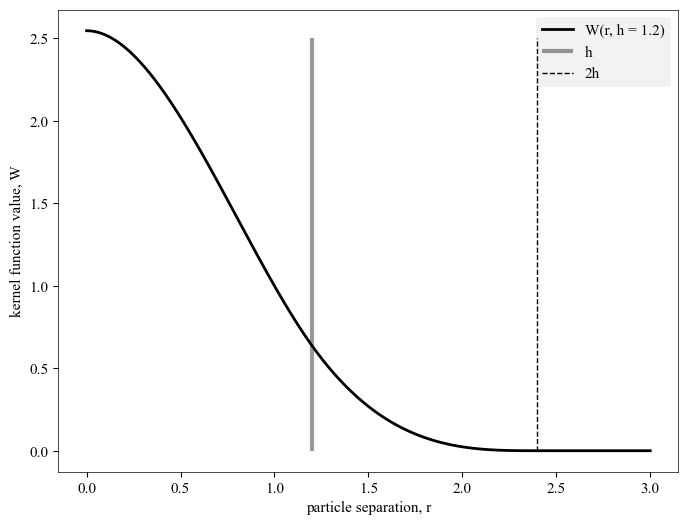

In [26]:
rlist = np.linspace(0, 3, 1000)
h = 1.2
plt.plot(rlist, W(rlist, h), label=f'W(r, h = {h})', color='k', lw=2, zorder=-1)
plt.vlines(h, 0, 2.5, color='k', lw=3, alpha=0.4, label='h')
plt.vlines(2 * h, 0, 2.5, color='k', linestyle='--', lw=1,alpha=1, label='2h')

plt.legend()
plt.xlabel('particle separation, r')
plt.ylabel('kernel function value, W')
plt.show()

In [27]:
# ls = np.linspace(0, 0.5, 100)
# plt.plot(ls, ls**2, label = '^2')
# plt.plot(ls, ls**3, label='^3')
# plt.legend()

In [28]:
# qls_1 = np.linspace(0, 0.5, 100)
# qls_2 = np.linspace(0.5, 1.0, 100)
# plt.plot(qls_1, 1 - 6 * qls_1**2 + 6 * qls_1**3)
# plt.plot(qls_2, 2 * (1 - qls_2)**3)

In [29]:
# qls_1 = np.linspace(0, 0.5, 100)
# plt.plot(qls_1, 2 * qls_1, label = '^2')
# plt.plot(qls_1, 3 *qls_1**2, label='^3')
# plt.legend()

In [30]:
# plt.plot(qls_1, - 12 * qls_1 *  + 18 * qls_1**2)
# plt.plot(qls_2, 6 * (1 - qls_2)**2 * 1)

In [31]:
from gravhydro import dWdr

In [32]:
# def dWdr(r, h):
#     '''Gradient of the SPH kernel function W with respect'''
#     q = r / (2 * h) 
#     grad_q = 1 / (2 * h)
#     first_mask = (q >= 0) & (q <= 1/2)
#     second_mask = (q > 1/2) & (q <= 1)
#     third_mask = ~ (first_mask | second_mask)
#     dWdr = np.zeros_like(r)
#     dWdr[first_mask] = 8 * (- 12 * q[first_mask]*grad_q + 18 * q[first_mask]**2 * grad_q) / np.pi
#     dWdr[second_mask] = 8 * (6 * (1 -  q[second_mask])**2 * (-1 * grad_q)) / np.pi
#     dWdr[third_mask] = 0
#     return dWdr
    

Text(0, 0.5, 'dW/dr')

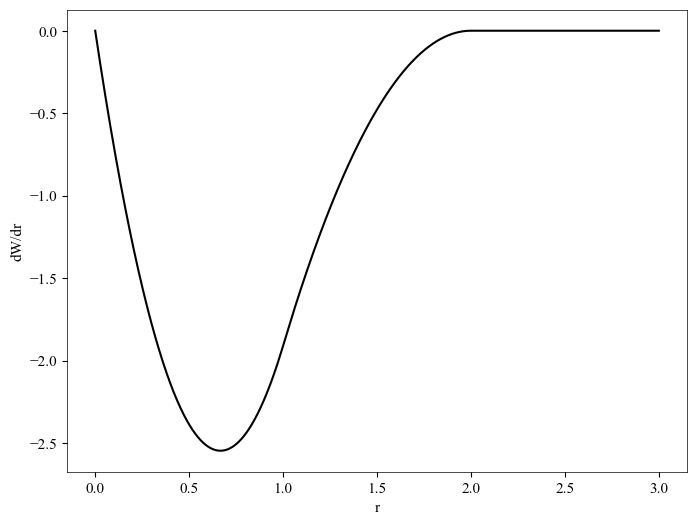

In [33]:
out = dWdr(rlist, 1.0)
plt.plot(rlist, out)
plt.xlabel('r')
plt.ylabel('dW/dr')

In [34]:
# def gradW(r_vec, h):
#     r = np.linalg.norm(r_vec, axis=1)
#     dW_dr = dWdr(np.array(r), h)
#     # print(dW_dr.shape, r.shape)
#     # print(dW_dr[np.newaxis].shape, r[np.newaxis].shape)
#     # print(r_vec / r[:, np.newaxis])
#     gradW = dW_dr[:,np.newaxis] * (r_vec / r[:, np.newaxis])
#     return gradW

In [35]:
from gravhydro import gradW

In [36]:
gradW(np.array([[1.0, 0.0], [0.0, 1.0]]), 1.0)

array([[-1.90985932, -0.        ],
       [-0.        , -1.90985932]])

In [37]:
# def propertyField_i(point, positions, masses, densities, values, h):
#     '''Estimated value of propety at a point'''
#     r_ij = r_i - r_s  # vector from particle j to particle i
#     r_mag = 
#     W_ij = W(r_ij, h)
#     totalValue = np.sum(masses[:, np.newaxis] * values[:, np.newaxis] * W_ij / densities[:,np.newaxis], axis=0)
#     return totalValue

In [38]:
# propertyField_i(pos[1],pos, masses, rhos, masses, 1.0)

In [39]:
# def propertyField(pos, masses, densities, values, h):
#     '''compute field of property values at particle positions'''
#     nParticles = len(pos)
#     propField = np.zeros(nParticles)
#     for i in range(nParticles):
#         propField[i] = propertyField_i(pos[i], pos, masses, densities, values, h)
#     return propField

In [40]:
# propertyField(pos, masses, rhos, masses, h)

In [41]:
# def propertyGradientField(pos, masses, densities, values, h):
#     '''compute field of property gradients at particle positions'''
#     nParticles = len(pos)
#     propGradField = np.zeros((nParticles, pos.shape[1]))
#     for i in range(nParticles):
#         r_vec = pos[i] - pos  # vector from all particles to particle i
#         r = np.linalg.norm(r_vec, axis=1)  # distances to particle i
#         gradW_ij = gradW(r_vec, h)  # kernel gradient values
#         mag_gradW_ij = np.linalg.norm(gradW_ij, axis=1)
#         print(densities[i].shape, values.shape, masses.shape)
#         propGradField[i] = np.sum(masses * values * mag_gradW_ij / densities[i]) * (gradW_ij / mag_gradW_ij)  # sum over all particles
#     return propGradField

In [42]:
# def propertyGradientField(pos, masses, densities, values, h):
#     '''compute field of property gradients at particle positions'''
#     nParticles = len(pos)
#     propGradField = np.zeros((nParticles, pos.shape[1]))
#     for i in range(nParticles):
#         r_vec = pos[i] - pos  # vector from all particles to particle i
#         r = np.linalg.norm(r_vec, axis=1)  # distances to particle i
#         gradW_ij = gradW(r_vec, h)  # kernel gradient values
#         mag_gradW_ij = np.linalg.norm(gradW_ij, axis=1)
#         print(densities[i].shape, values.shape, masses.shape)
#         propGradField[i] = np.sum(masses * values * mag_gradW_ij / densities[i]) * (gradW_ij / mag_gradW_ij)  # sum over all particles
#     return propGradField

In [43]:
#propertyGradientField(pos, masses, rhos, rhos, h=1.0)

In [44]:
# def calcPropertyGradAtPoint(r_i, r_s, masses, densities, properties, h):
#     r_ij = r_i - r_s  # vector from particle j to particle i
#     mask = np.linalg.norm(r_ij, axis=1) > 0
#     r_ij = r_ij[mask]
#     masses = masses[mask]
#     densities = densities[mask]
#     properties = properties[mask]
#     gradW_ij = gradW(r_ij, h)  # gradient of kernel function
#     #print(gradW_ij * properties[:, np.newaxis])
#     prop_grad = np.sum(masses[:, np.newaxis] * properties[:, np.newaxis] * gradW_ij / densities[:,np.newaxis], axis=0)
#     return prop_grad

In [45]:
# def calcGradientOfMany(r_s, masses, densities, values, h):
#     gradients = np.zeros_like(r_s)
#     for i, r_i in enumerate(r_s):
#         gradients[i] = calcPropertyGradAtPoint(r_i, r_s, masses, densities, values, h)
#     return gradients

In [46]:
from gravhydro import propertyGradients, propertyGradient_i

(array([ 17.,  35.,  88., 121., 243., 276., 210., 137.,  56.,  17.]),
 array([ 60.21039217, 124.84792234, 189.4854525 , 254.12298267,
        318.76051284, 383.39804301, 448.03557318, 512.67310335,
        577.31063352, 641.94816369, 706.58569385]),
 <BarContainer object of 10 artists>)

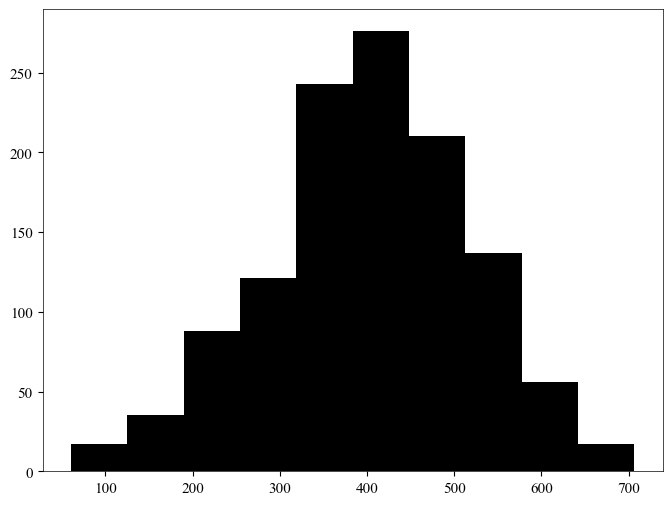

In [47]:
plt.hist(rhos)

Text(0, 0.5, 'y')

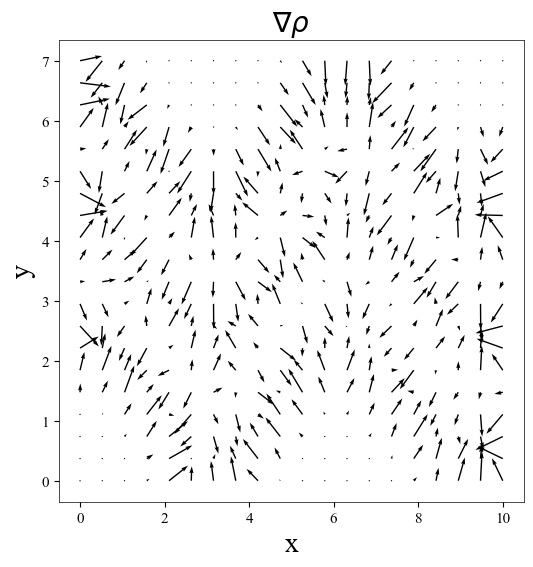

In [48]:
grid_sz = 20
density_grad_grid = np.zeros((grid_sz, grid_sz, pos.shape[-1]))
og_pt =  np.zeros((grid_sz, grid_sz, pos.shape[-1]))
xgrid = np.linspace(0, 10, grid_sz)
ygrid = np.linspace(0, 7, grid_sz)
for i, x in enumerate(xgrid):
    for j, y in enumerate(ygrid):
        og_pt[i, j] = np.array([x, y])
        density_grad_grid[i, j] = propertyGradient_i(og_pt[i, j], pos, masses, rhos, masses, h=0.5)

plt.figure(figsize=(6,6))
plt.quiver(*og_pt.T, *density_grad_grid.T, angles='xy', scale= 300)

plt.title('$\\nabla \\rho$', fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)

Text(0, 0.5, 'y')

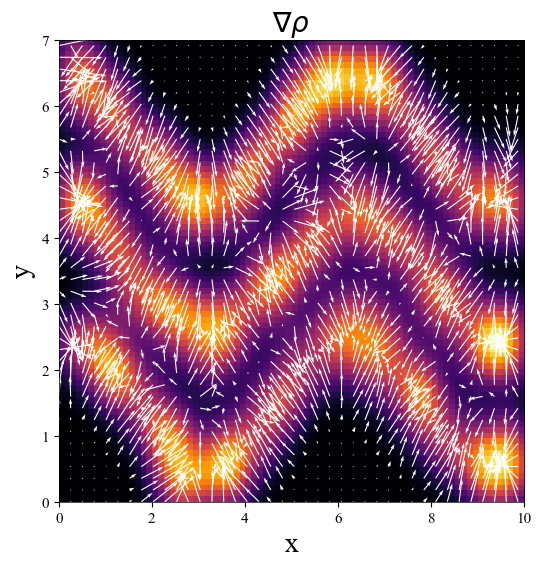

In [49]:
grid_sz = 80
density_grid = np.zeros((grid_sz, grid_sz))
density_grad_grid = np.zeros((int(grid_sz/2), int(grid_sz/2), pos.shape[-1]))
og_pt =  np.zeros((int(grid_sz/2), int(grid_sz/2), pos.shape[-1]))
xgrid = np.linspace(0, 10, grid_sz)
ygrid = np.linspace(0, 7, grid_sz)
for i, x in enumerate(xgrid):
    for j, y in enumerate(ygrid):
        density_grid[i, j] = density_i(np.array([x, y]), pos, masses, h=0.55)
        if i % 2 == 0 and j % 2 == 0:
            og_pt[int(i/2), int(j/2)] = np.array([x, y])
            density_grad_grid[int(i/2), int(j/2)] = propertyGradient_i(np.array([x, y]), pos, masses, rhos, masses, h=0.5)
plt.figure(figsize=(6,6))
plt.imshow(density_grid.T, extent=(xgrid.min(), xgrid.max(), ygrid.min(), ygrid.max()), origin='lower', aspect='auto', cmap='inferno')
plt.quiver(*og_pt.T, *density_grad_grid.T, angles='xy', scale= 200, color='w')
plt.title('$\\nabla \\rho$', fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)


In [50]:
# import numpy as np
# import plotly.graph_objects as go

# # Define a range of h values
# h_values = np.linspace(0.1, 2.0, 20)

# # Create frames for the animation
# frames = []
# for h in h_values:
#     density_grad_grid = np.zeros((grid_sz, grid_sz, pos.shape[-1]))
#     for i, x in enumerate(xgrid):
#         for j, y in enumerate(ygrid):
#             density_grad_grid[i, j] = calcPropertyGradAtPoint(np.array([x, y]), pos, masses, rhos, masses, h=h)
#     frame = go.Frame(
#         data=[
#             go.Cone(
#                 x=og_pt[:, :, 0].flatten(),
#                 y=og_pt[:, :, 1].flatten(),
#                 u=density_grad_grid[:, :, 0].flatten(),
#                 v=density_grad_grid[:, :, 1].flatten(),
#                 sizemode="scaled",
#                 sizeref=300,
#                 anchor="tail",
#             )
#         ],
#         name=f"h={h:.2f}",
#     )
#     frames.append(frame)

# # Create the initial plot
# initial_h = h_values[0]
# initial_density_grad_grid = np.zeros((grid_sz, grid_sz, pos.shape[-1]))
# for i, x in enumerate(xgrid):
#     for j, y in enumerate(ygrid):
#         initial_density_grad_grid[i, j] = calcPropertyGradAtPoint(np.array([x, y]), pos, masses, rhos, masses, h=initial_h)

# # Create the figure
# fig = go.Figure(
#     data=[
#         go.Cone(
#             x=og_pt[:, :, 0].flatten(),
#             y=og_pt[:, :, 1].flatten(),
#             u=initial_density_grad_grid[:, :, 0].flatten(),
#             v=initial_density_grad_grid[:, :, 1].flatten(),
#             sizemode="scaled",
#             sizeref=300,
#             anchor="tail",
#         )
#     ],
#     layout=go.Layout(
#         title="Density Gradient Field with Adjustable h",
#         xaxis=dict(title="x"),
#         yaxis=dict(title="y"),
#         sliders=[
#             dict(
#                 active=0,
#                 currentvalue={"prefix": "h: "},
#                 pad={"t": 50},
#                 steps=[
#                     dict(
#                         method="animate",
#                         args=[
#                             [f"h={h:.2f}"],
#                             dict(frame=dict(duration=500, redraw=True), mode="immediate"),
#                         ],
#                         label=f"{h:.2f}",
#                     )
#                     for h in h_values
#                 ],
#             )
#         ],
#         updatemenus=[
#             dict(
#                 type="buttons",
#                 showactive=False,
#                 buttons=[
#                     dict(label="Play",
#                          method="animate",
#                          args=[None, dict(frame=dict(duration=500, redraw=True), fromcurrent=True)]),
#                     dict(label="Pause",
#                          method="animate",
#                          args=[[None], dict(frame=dict(duration=0, redraw=False), mode="immediate")])
#                 ],
#                 )
#         ]
#     ),
#    frames=frames,
# )
# # Show the interactive plot)
# fig.show()
# # Show the interactive plot


In [51]:
# grid_sz = 20
# density_grad_grid = np.zeros((grid_sz, grid_sz, pos.shape[-1]))
# og_pt =  np.zeros((grid_sz, grid_sz, pos.shape[-1]))
# xgrid = np.linspace(0, 10, grid_sz)
# ygrid = np.linspace(0, 7, grid_sz)
# for i, x in enumerate(xgrid):
#     for j, y in enumerate(ygrid):
#         og_pt[i, j] = np.array([x, y])
#         density_grad_grid[i, j] = calcPropertyGradAtPoint(og_pt[i, j], pos, masses, rhos, masses, h=0.5)

# plt.figure(figsize=(6,6))
# plt.quiver(*og_pt.T, *density_grad_grid.T, angles='xy', scale= 300)
# plt.title('$\\nabla \\rho$', fontsize=20)
# plt.xlabel('x', fontsize=20)
# plt.ylabel('y', fontsize=20)

In [52]:
#grads = calcGradientOfMany(pos, masses, rhos, masses, h=1.5)

In [53]:
# mask1 = (np.linalg.norm(pos, axis=1) > lim0 - dr/2) #and (np.linalg.norm(pos, axis=1) > lim0 + (dr*3.5))
# mask2 = np.linalg.norm(pos, axis=1) < lim0 + (dr*4.5)

In [54]:
#plt.hist(np.linalg.norm(grads, axis=1))

In [51]:
# grad_mag = np.linalg.norm(grads, axis=1)
# mask = grad_mag < np.mean(grad_mag) + np.std(grad_mag) * 1.0 #None#np.logical_and(mask1, mask2)

In [52]:
# plt.figure(figsize=(6,6))
# plt.quiver(*pos[mask].T, *grads[mask].T, angles='xy', scale= 800)
# #plt.scatter(pos[:, 0], pos[:, 1], c=rhos, cmap='RdBu', s=5, vmin=mean_rho-minmax, vmax=mean_rho + minmax)
# plt.title('$\\nabla \\rho$', fontsize=20)
# plt.xlabel('x', fontsize=20)
# plt.ylabel('y', fontsize=20)

In [53]:
# plt.figure(figsize=(6,6))
# plt.scatter(pos[:, 0], pos[:, 1], c=rhos, cmap='RdBu', s=5, vmin=mean_rho-minmax, vmax=mean_rho + minmax)
# plt.quiver(*pos[mask].T, *grads[mask].T, angles='xy', scale= 40000)

# plt.title('$\\nabla \\rho$', fontsize=20)
# plt.xlabel('x', fontsize=20)
# plt.ylabel('y', fontsize=20)

# Pressure

the pressure depends on the density

In [54]:
# def pressureForce_ij(r_vec, mj, pi, pj, rhoi, rhoj, h):
#     '''pressure force from particle j on particle i'''
#     print(r_vec.shape)
#     return - mj * (pi / rhoi**2 + pj / rhoj**2) * gradW(r_vec, h) #/ rhoj

In [55]:
# def pressureForce_i(i, pos, rhos, masses, rho0, cs, h):
#     '''total pressure force on particle i'''
#     rho_i = rhos[i]
#     pi = pressure(rho_i, rho0, cs)
#     r_i = pos[i]

#     totalPressure = 0
#     for j in range(len(r_i)):
#         if j == i:
#             continue
#         r_vec = r_i - pos[j]
#         rho_j = rhos[j]
#         pj = pressure(rho_j, rho0, cs)
#         totalPressure += pressureForce_ij(r_vec, masses[j], pi, pj, rho_i, rho_j, h)
#         # # compute pressure force from particle j on particle i
#         # f_ij = pressure_ij(m, p_i[i], p_i[j], rho_i[i], rho_i[j])
#         # # accumulate forces
#         # f_i[i] += f_ij

In [56]:
# def pressure(densities, rho0, cs):
#     '''
#     Parameters
#     ----------
#     density : array_like
#         Density for particle of interest.
#     ref_density : float
#         fluid reference density.
#     sound_speed : float
#         fluid sound speed.
#         '''
#     return cs**2 * (densities - rho0)

In [57]:
from gravhydro import pressure

In [58]:
from matplotlib import cm
colors = cm.inferno

In [59]:
target_dens = np.mean(rhos)
pressures = pressure(rhos, target_dens, 1)

In [60]:
# # the same plot as before, but now the points a scaled by their density
# plt.figure(figsize=(6, 6))
# minmax = max([np.abs(np.min(pressures)), np.max(pressures)])
# plt.scatter(pos[:, 0], pos[:, 1], s=rhos/50, c=pressures, cmap='RdBu', vmin=-minmax, vmax=minmax)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

## Pressure Gradient

In [61]:
#pressure_grads = calcGradientOfMany(pos, masses, rhos, -pressures, h=1.0)

Text(0, 0.5, 'y')

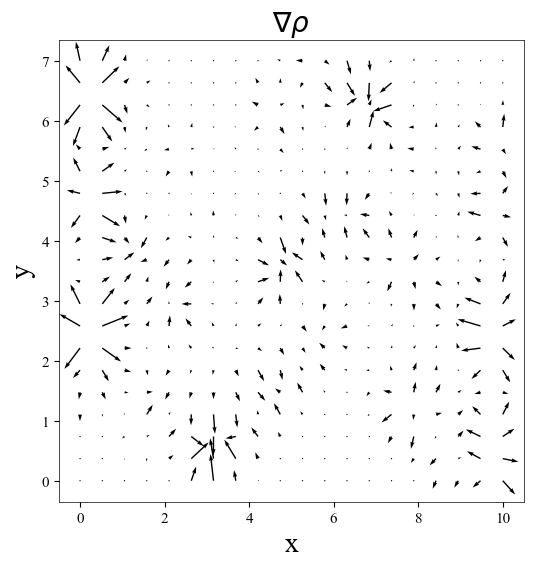

In [62]:
grid_sz = 20
density_grad_grid = np.zeros((grid_sz, grid_sz, pos.shape[-1]))
og_pt =  np.zeros((grid_sz, grid_sz, pos.shape[-1]))
xgrid = np.linspace(0, 10, grid_sz)
ygrid = np.linspace(0, 7, grid_sz)
for i, x in enumerate(xgrid):
    for j, y in enumerate(ygrid):
        og_pt[i, j] = np.array([x, y])
        density_grad_grid[i, j] = propertyGradient_i(og_pt[i, j], pos, masses, rhos, pressures, h=0.5)

plt.figure(figsize=(6,6))
plt.quiver(*og_pt.T, *density_grad_grid.T, angles='xy', scale= 5000)

plt.title('$\\nabla \\rho$', fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)

In [63]:
# plt.figure(figsize=(6,6))
# plt.quiver(*pos.T, *pressure_grads.T, angles='xy', scale= 15000)
# plt.title('$\\nabla p$', fontsize=20)
# plt.xlabel('x', fontsize=20)
# plt.ylabel('y', fontsize=20)

In [64]:
# now lets make a proper vector field plot

In [65]:
# # TO FIX: vectorize this function and remove self-summing
# def densities(positions, masses, h):
#     dens = np.zeros(positions.shape[0])
#     for i in range(positions.shape[0]):
#         dens[i] = density_i(positions[i], positions, masses, h)
#     return dens

In [66]:
# rlist = np.linspace(0, 3, 1000)
# h = 1.2
# plt.plot(rlist, W(rlist, h), label=f'W(r, h = {h})', color='k', lw=2, zorder=-1)
# plt.vlines(h, 0, 2.5, color='k', lw=3, alpha=0.4, label='h')
# plt.vlines(2 * h, 0, 2.5, color='k', linestyle='--', lw=1,alpha=1, label='2h')

# plt.legend()
# plt.xlabel('particle separation, r')
# plt.ylabel('kernel function value, W')
# plt.show()

In [67]:
# rlist = np.linspace(0, 3, 1000)
# h = 1.2
# plt.plot(rlist, Wderiv(rlist, h), label=f'W(r, h = {h})', color='k', lw=2, zorder=-1)
# plt.vlines(h, 0, 2.5, color='k', lw=3, alpha=0.4, label='h')
# plt.vlines(2 * h, 0, 2.5, color='k', linestyle='--', lw=1,alpha=1, label='2h')

# plt.legend()
# plt.xlabel('particle separation, r')
# plt.ylabel('kernel function value, W')
# plt.show()

# Acceleration

In [68]:
# def acc_inside_term(i, j, pressures, densities):
#     return (pressures[i] / densities[i]**2) + (pressures[j] / rhos[j]**2)

In [69]:
from gravhydro import acc_inside_term_ij, acc_inside_term_i, acc_inside_terms

In [79]:
inside_terms = acc_inside_terms(pressures, rhos)

In [80]:
# inside_terms = np.zeros_like(rhos)
# for i in range(len(rhos)):
#     # inside_term_i = 0
#     # for j in range(len(rhos)):
#     #     if i == j:
#     #         continue
#     #     else:
#     #         inside_term_i += acc_inside_term(i, j, pressures, rhos)
#     inside_terms[i] = acc_inside_term_i(i, pressures, rhos)

In [81]:
inside_terms

array([ 0.10322057, -0.15833681, -0.10584288, ..., -0.13341735,
       -0.14462073, -0.17838696], shape=(1200,))

In [75]:
acc = -1 * propertyGradients(pos, masses, rhos, inside_terms, h=0.5)

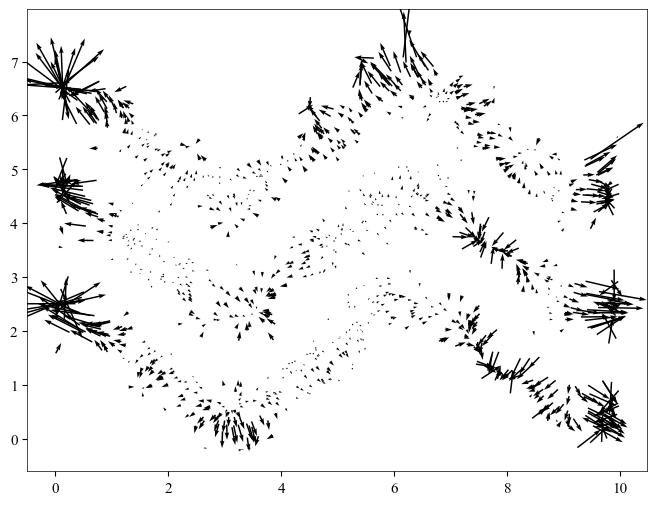

In [76]:
plt.quiver(*pos.T, *acc.T)

Text(0, 0.5, 'y')

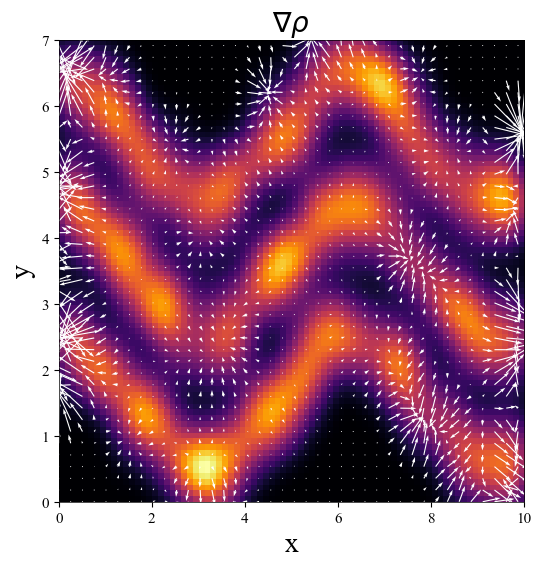

In [77]:
grid_sz = 80
density_grid = np.zeros((grid_sz, grid_sz))
acc_grid = np.zeros((int(grid_sz/2), int(grid_sz/2), pos.shape[-1]))
og_pt =  np.zeros((int(grid_sz/2), int(grid_sz/2), pos.shape[-1]))
xgrid = np.linspace(0, 10, grid_sz)
ygrid = np.linspace(0, 7, grid_sz)
for i, x in enumerate(xgrid):
    #inside_term = acc_inside_term(i, j, rhos, pressures)
    for j, y in enumerate(ygrid):
        density_grid[i, j] = density_i(np.array([x, y]), pos, masses, h=0.55)
        if i % 2 == 0 and j % 2 == 0:
            og_pt[int(i/2), int(j/2)] = np.array([x, y])
            acc_grid[int(i/2), int(j/2)] = -1 * propertyGradient_i(np.array([x, y]), pos, masses, rhos, inside_terms, h=0.5)
plt.figure(figsize=(6,6))
plt.imshow(density_grid.T, extent=(xgrid.min(), xgrid.max(), ygrid.min(), ygrid.max()), origin='lower', aspect='auto', cmap='inferno')
plt.quiver(*og_pt.T, *acc_grid.T, angles='xy', scale= 7, color='w')
plt.title('$\\nabla \\rho$', fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)

In [78]:
inside_term

NameError: name 'inside_term' is not defined

In [ ]:
pressures

array([  51.52292977, -146.44521164,  106.20287876, ...,  -36.46079389,
          2.19446509, -215.68764467], shape=(1200,))

In [ ]:
pressures

array([  51.52292977, -146.44521164,  106.20287876, ...,  -36.46079389,
          2.19446509, -215.68764467], shape=(1200,))

In [ ]:
rhos

array([1170.90645865,  972.93831724, 1225.58640764, ..., 1082.92273499,
       1121.57799396,  903.6958842 ], shape=(1200,))

In [ ]:
def acceleration():
    pass

def gradientOperator(p_j):
    '''Discrete gradient operator'''
    


In [ ]:
# def acceleration_i():
#     drhoi_dh = calcPropertyGradAtPoint(r_vec, pos, masses, rhos, rhos, h=0.5)

In [ ]:
# def acceleration_ij(r_i, r_j, rho_i, rho_j, h, m_j):
#     '''acceleration of particle i from particle j'''
#     r_vec = r_i - r_j
#     drhoi_dh = calcPropertyGradAtPoint(r_vec, pos, masses, rhos, rhos, h=0.5)
#     f_i = (1 + h  * drhoi_dh / (3 * rho_i))**-1
#     f_j = (1 + h  * drhoj_dh / (3 * rho_j))**-1
#     first_term = f_i * P_i * gradW(r_i - r_j, h) / rho_i**2
#     second_term = f_j * P_j * gradW(r_i - r_j, h) / rho_j**2
#     return m_j * (first_term + second_term)

# def acceleration_i(r_i, rs):
#     '''total acceleration of particle i'''
#     total_acceleration = 0
#     for r_j in rs:
#         if r_j != r_i:
#             total_acceleration += acceleration_ij(r_i, r_j)
#     return total_acceleration

# def acceleration(rs):
#     '''calculate acceleration on all particles'''
#     accelerations = np.zeros(len(rs))
#     for i, r_i in enumerate(rs):
#         accelerations[i] = acceleration_i(r_i, rs)
#     return accelerations

In [ ]:
# def acceleration_ij(r_i, r_j, rho_i, rho_j, h_i, h_j, m_j):
#     '''acceleration of particle i from particle j'''
#     f_i = (1 + h_i  * drhoi_dhi / (3 * rho_i))**-1
#     f_j = (1 + h_j  * drhoj_dhj / (3 * rho_j))**-1
#     first_term = f_i * P_i * gradW(r_i - r_j, h_i) / rho_i**2
#     second_term = f_j * P_j * gradW(r_i - r_j, h_j) / rho_j**2
#     return m_j * (first_term + second_term)

# def acceleration_i(r_i, rs):
#     '''total acceleration of particle i'''
#     total_acceleration = 0
#     for r_j in rs:
#         if r_j != r_i:
#             total_acceleration += acceleration_ij(r_i, r_j)
#     return total_acceleration

# def acceleration(rs):
#     '''calculate acceleration on all particles'''
#     accelerations = np.zeros(len(rs))
#     for i, r_i in enumerate(rs):
#         accelerations[i] = acceleration_i(r_i, rs)
#     return accelerations

In [ ]:
p1 = pressureForce_i(1, pos, rhos, masses, rho0=1.0, cs=1.0)

NameError: name 'pressureForce_i' is not defined

In [ ]:
p1

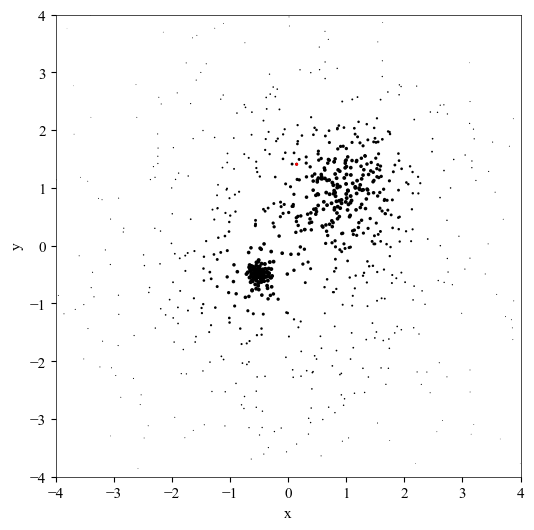

In [ ]:
kernel = gaussian_kde(pos.T, weights=masses)
pdf = kernel.evaluate
rhos = pdf(pos.T)

# the same plot as before, but now the points a scaled by their density
plt.figure(figsize=(6, 6))
plt.scatter(pos[:, 0], pos[:, 1], s=rhos*100)
i = 1
plt.scatter(pos[:, 0][i], pos[:, 1][i], s=rhos[i]*100, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()